Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Memuat Dataset**

In [ ]:
#Type your code here
df = pd.read_csv('/content/drive/MyDrive/Crop_Dataset/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **Exploratory Data Analysis (EDA)**

### Exploratory Data Analysis - Deskripsi Variabel


In [ ]:
def tentukan_musim(row):
    if row['rainfall'] > 150:
        return 'hujan'
    else:
        return 'kemarau'

df['musim'] = df.apply(tentukan_musim, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   musim        2200 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 154.8+ KB


In [ ]:
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah baris dan kolom: (2200, 9)


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df['musim'].value_counts()

,count
musim,
kemarau,1775
hujan,425


In [ ]:
df.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
musim,0


In [ ]:
print(f' Jumlah duplikasi data: {df.duplicated().sum()}')

 Jumlah duplikasi data: 0


#### Visualisasi boxplot

<Axes: xlabel='N'>

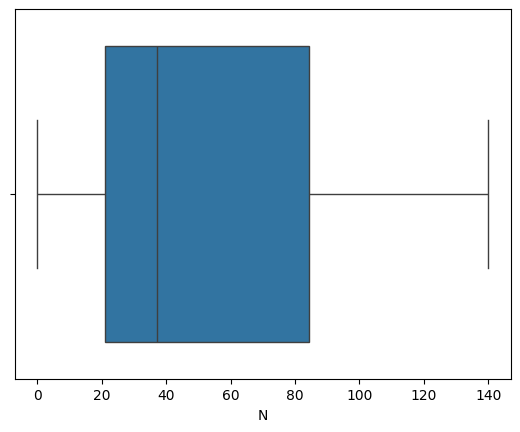

In [ ]:
sns.boxplot(x=df['N'])

<Axes: xlabel='P'>

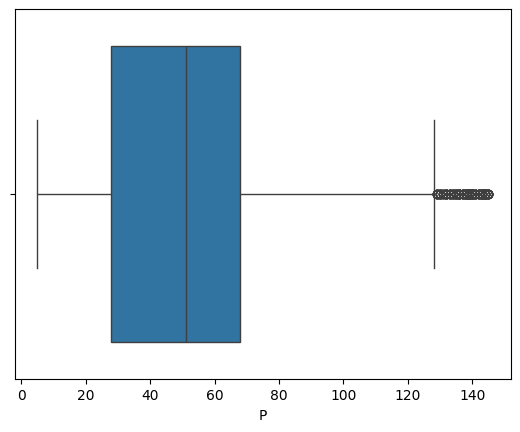

In [ ]:
sns.boxplot(x=df['P'])

<Axes: xlabel='K'>

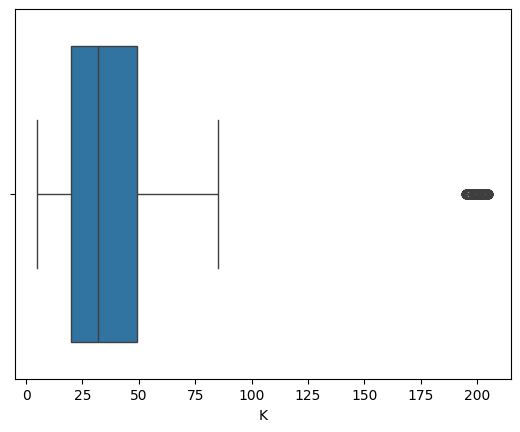

In [ ]:
sns.boxplot(x=df['K'])

<Axes: xlabel='temperature'>

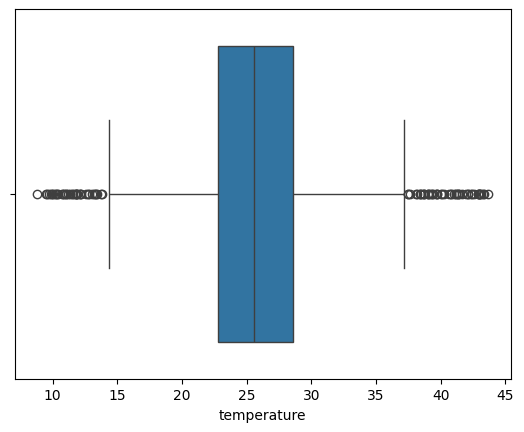

In [ ]:
sns.boxplot(x=df['temperature'])

<Axes: xlabel='humidity'>

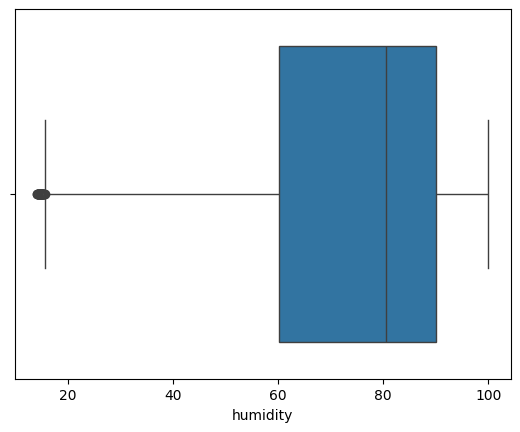

In [ ]:
sns.boxplot(x=df['humidity'])

<Axes: xlabel='ph'>

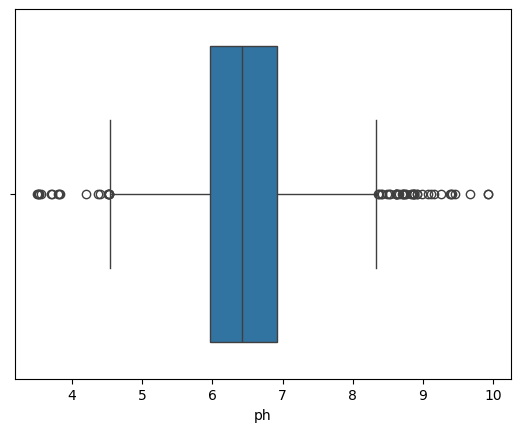

In [ ]:
sns.boxplot(x=df['ph'])

<Axes: xlabel='rainfall'>

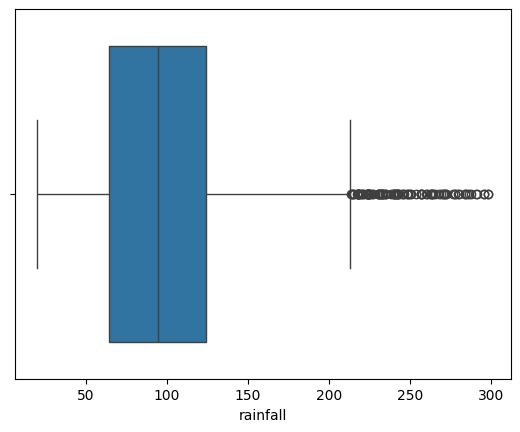

In [ ]:
sns.boxplot(x=df['rainfall'])

**Insight:** Bedasarkan visualisasi Boxplot di atas hampir semua terdapat outliers pada kolom *N*

#### Menangani outliers

In [ ]:
# Salin dataframe supaya data asli tetap aman
df_clean = df.copy()

# Loop untuk tiap fitur
for feature in df.select_dtypes(include='number'):
    Q1 = df_clean[feature].quantile(0.25)
    Q3 = df_clean[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data yang berada dalam batas normal
    df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]

print(f"Jumlah data setelah hapus outlier: {df_clean.shape[0]}")

Jumlah data setelah hapus outlier: 1846


#### Univariate Analysis

In [ ]:
numerical_features = df_clean.select_dtypes(include='number').columns
categorical_features = df_clean.select_dtypes(include='object').columns

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

Categorical Features:
Index(['label', 'musim'], dtype='object')


             jumlah sampel  persentase
label                                 
maize                  100         5.4
kidneybeans            100         5.4
mungbean               100         5.4
blackgram              100         5.4
jute                   100         5.4
coffee                 100         5.4
pomegranate            100         5.4
lentil                 100         5.4
banana                 100         5.4
cotton                 100         5.4
muskmelon              100         5.4
watermelon             100         5.4
coconut                100         5.4
pigeonpeas              96         5.2
mango                   96         5.2
chickpea                88         4.8
orange                  81         4.4
papaya                  63         3.4
rice                    62         3.4
mothbeans               60         3.3


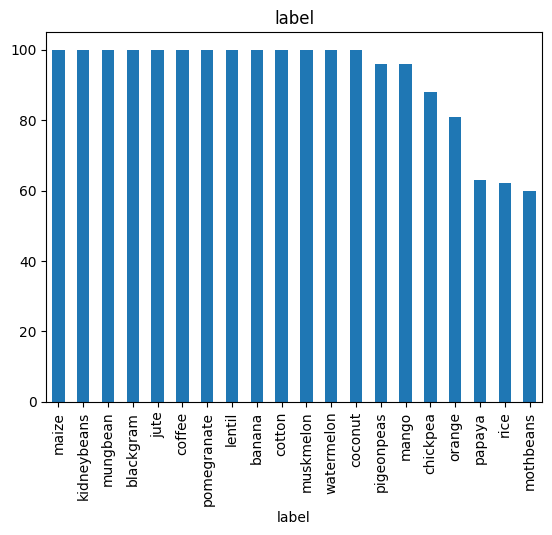

In [ ]:
feature = categorical_features[0]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

         jumlah sampel  persentase
musim                             
kemarau           1480        80.2
hujan              366        19.8


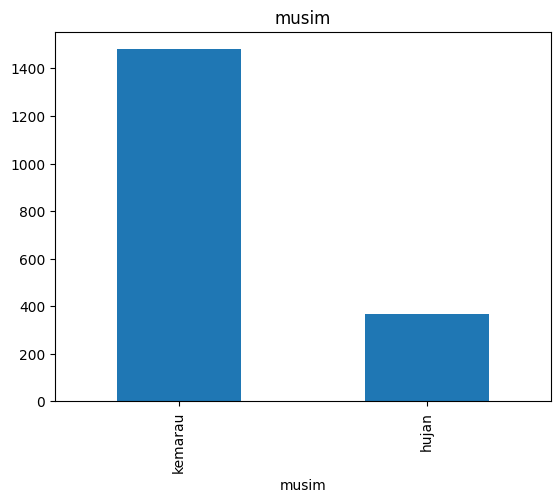

In [ ]:
feature = categorical_features[1]
count = df_clean[feature].value_counts()
percent = 100*df_clean[feature].value_counts(normalize=True)
df_sampel = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_sampel)
count.plot(kind='bar', title=feature);

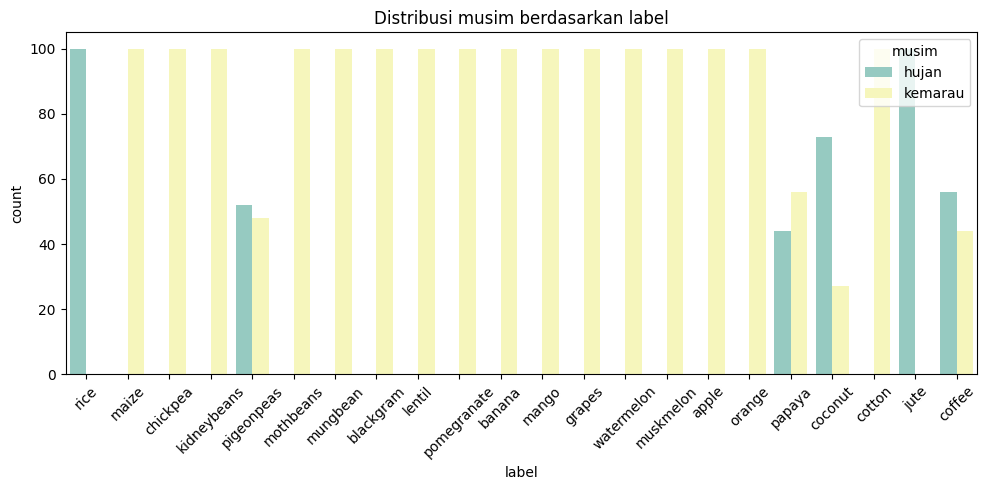

In [ ]:
cat_features = df.select_dtypes(include='object').columns.to_list()
cat_features.remove("musim")

for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue="musim", palette="Set3")
    plt.title(f"Distribusi musim berdasarkan {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### visualisasi Numerical Features

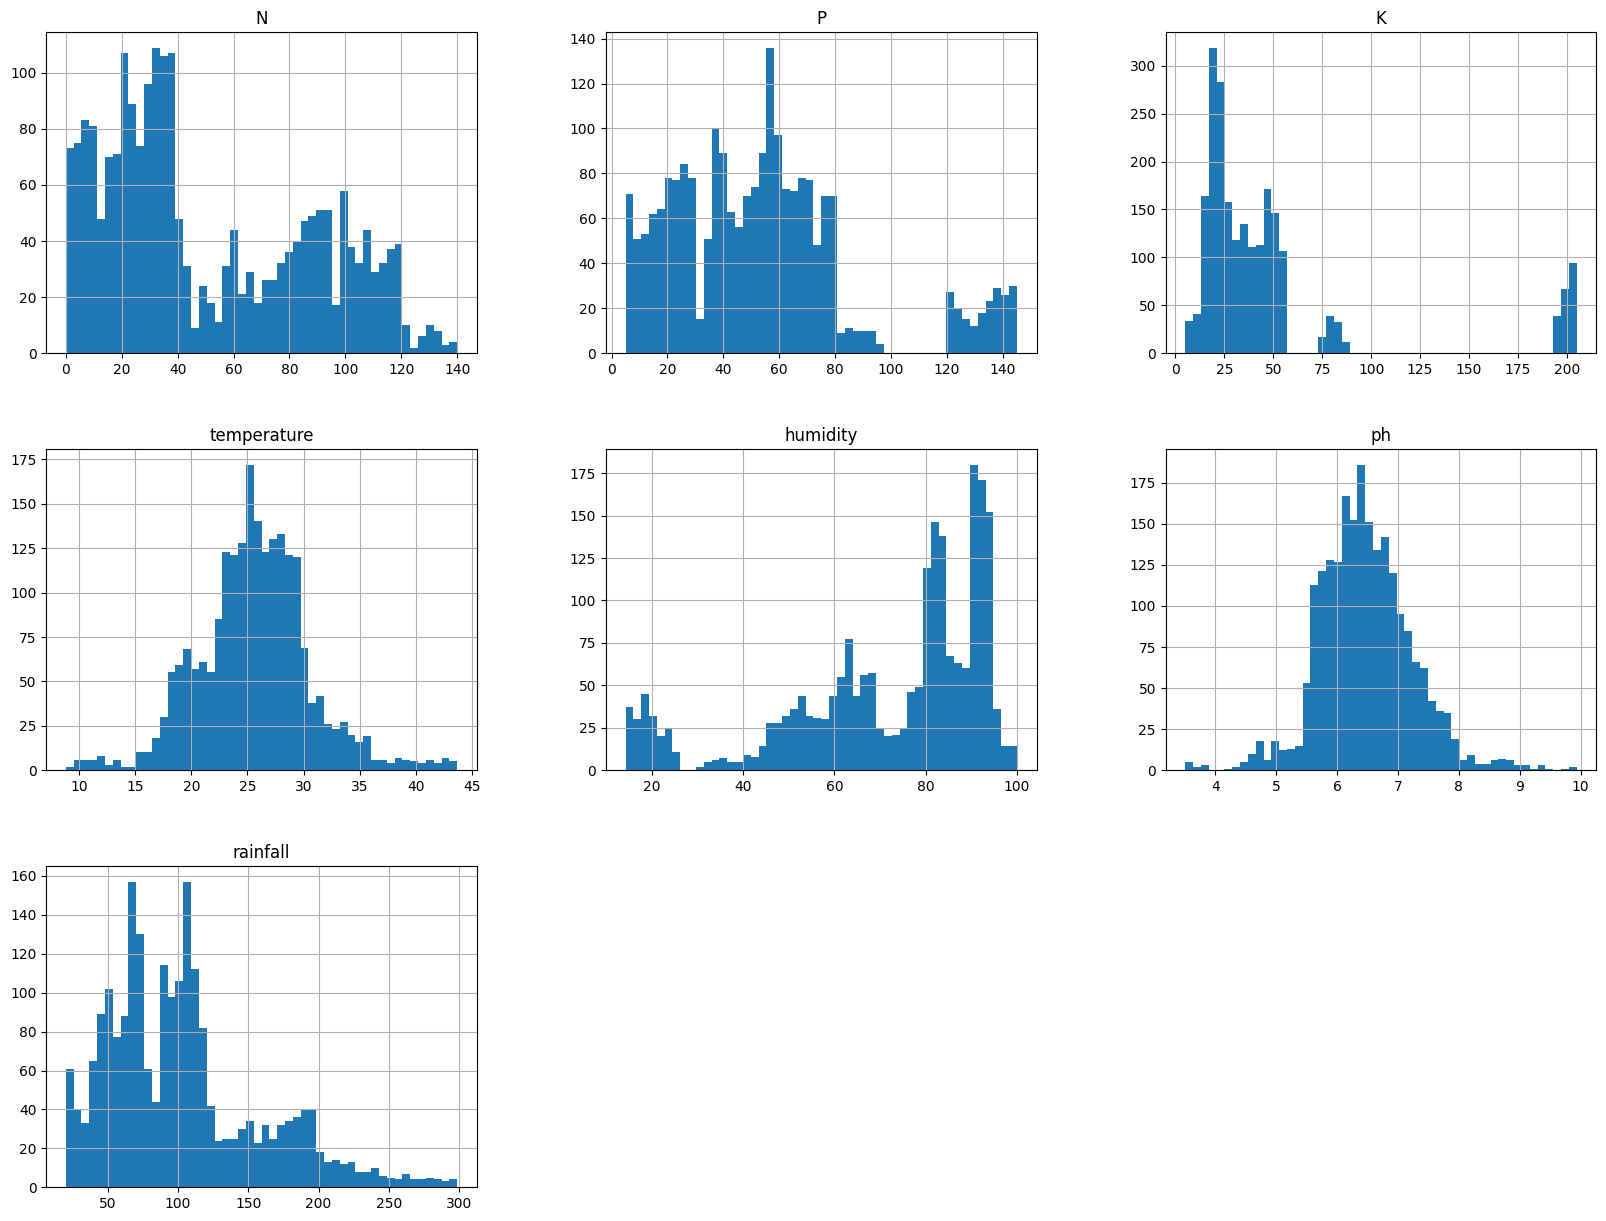

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Exploratory Data Analysis - Multivariate Analysis

**Insight:** Dari distibusi Gender di atas dapat dilihat bahwa *Male* cenderung lebih memiliki lebih banyak *Normalweight* dibanding *Female* dan *Female* lebih banyak memiliki kategori *Overweight* dibandingkan *Male*

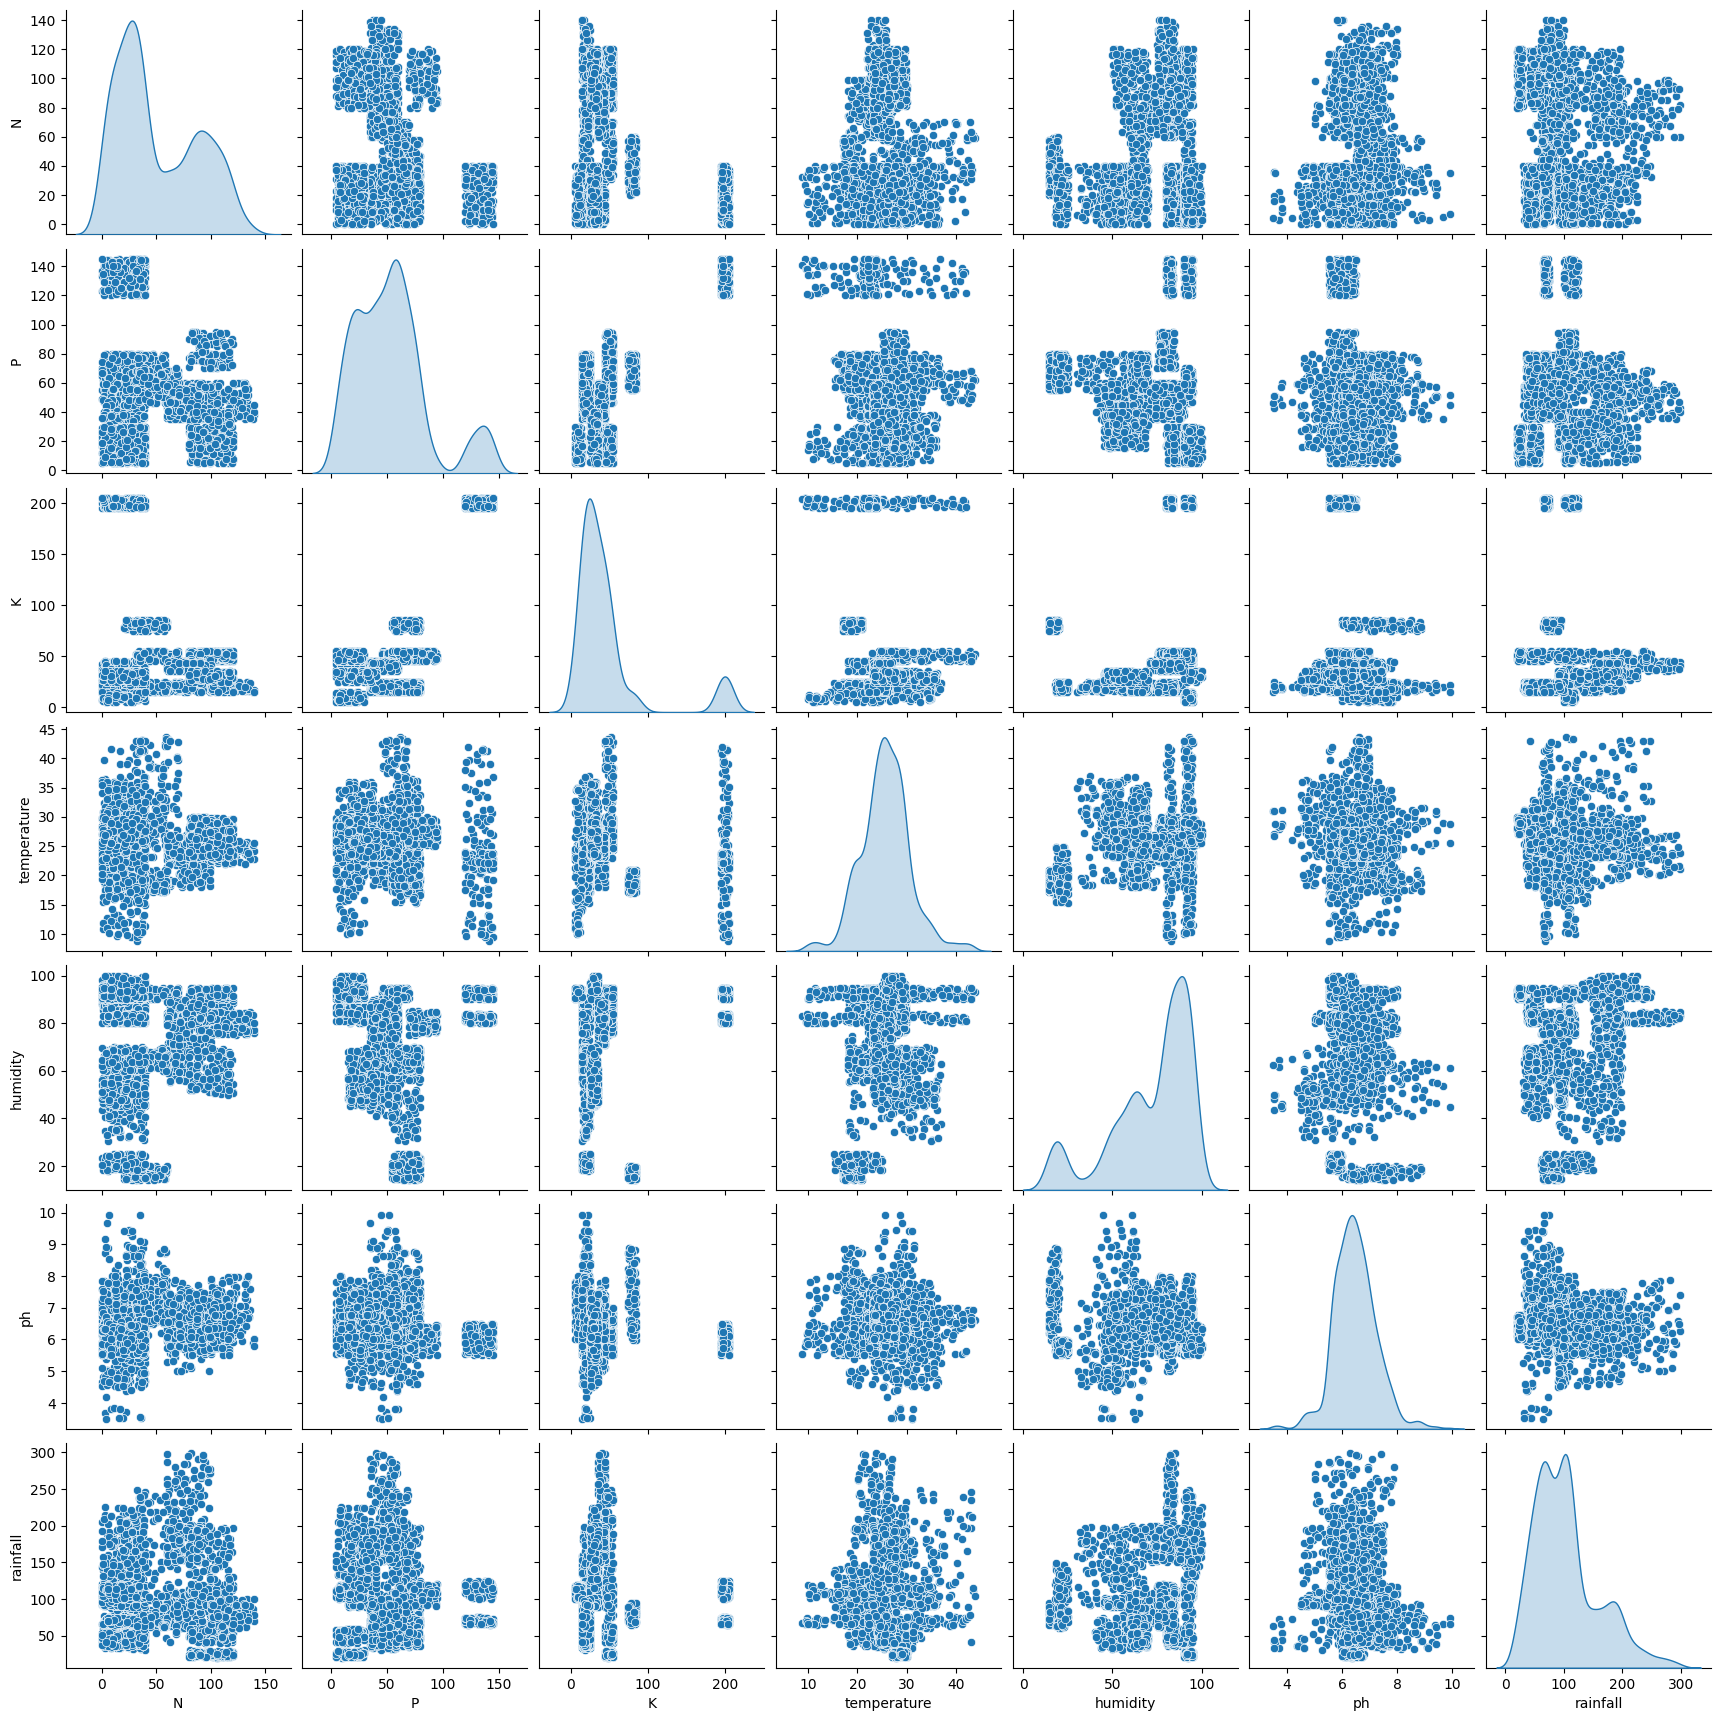

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

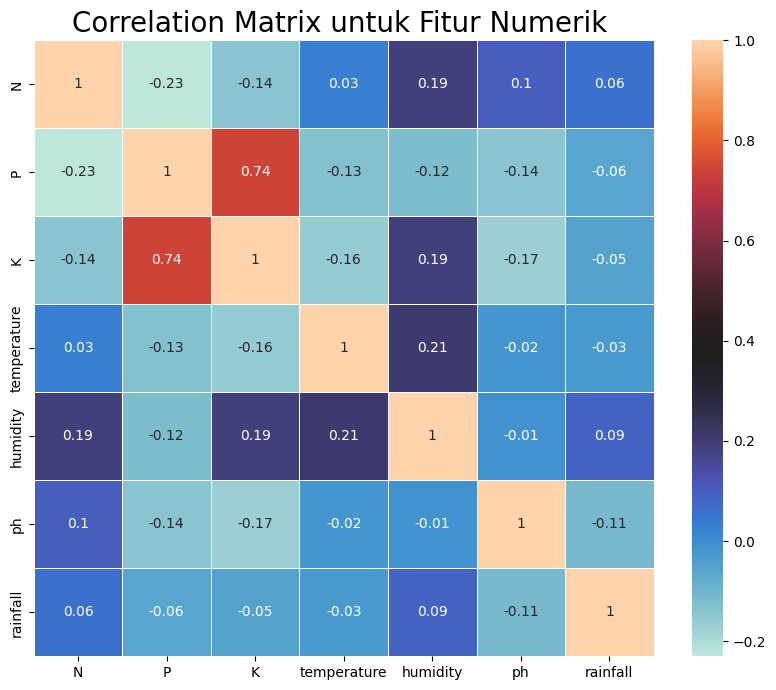

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='icefire', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


# **Data preparation**

In [ ]:
# Encoding label
le_label = LabelEncoder()
df_clean['label'] = le_label.fit_transform(df_clean['label'])

# Simpan mapping label
label_mapping = dict(zip(le_label.classes_, le_label.transform(le_label.classes_)))
print("label Mapping:", label_mapping)

# Encoding musimCategory
le_musim = LabelEncoder()
df_clean['musim'] = le_musim.fit_transform(df_clean['musim'])

# Simpan mapping musim
musim_mapping = dict(zip(le_musim.classes_, le_musim.transform(le_musim.classes_)))
print("musim Mapping:", musim_mapping)

# Lihat hasil akhir
df_clean.head()

label Mapping: {'banana': np.int64(0), 'blackgram': np.int64(1), 'chickpea': np.int64(2), 'coconut': np.int64(3), 'coffee': np.int64(4), 'cotton': np.int64(5), 'jute': np.int64(6), 'kidneybeans': np.int64(7), 'lentil': np.int64(8), 'maize': np.int64(9), 'mango': np.int64(10), 'mothbeans': np.int64(11), 'mungbean': np.int64(12), 'muskmelon': np.int64(13), 'orange': np.int64(14), 'papaya': np.int64(15), 'pigeonpeas': np.int64(16), 'pomegranate': np.int64(17), 'rice': np.int64(18), 'watermelon': np.int64(19)}
musim Mapping: {'hujan': np.int64(0), 'kemarau': np.int64(1)}


,N,P,K,temperature,humidity,ph,rainfall,label,musim
0,90,42,43,20.879744,82.002744,6.502985,202.935536,18,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,18,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,18,0
7,94,53,40,20.277744,82.894086,5.718627,241.974195,18,0
8,89,54,38,24.515881,83.535216,6.685346,230.446236,18,0


In [ ]:
X = df_clean.drop('label', axis=1)
y = df_clean['label']

print(f'Jumlah shpae pada X: {X.shape}')
print(f'Jumlah shpae pada y: {y.shape}')

Jumlah shpae pada X: (1846, 8)
Jumlah shpae pada y: (1846,)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1846
Total # of sample in train dataset: 1476
Total # of sample in test dataset: 370


# **Modeling**

In [ ]:
# Latih model SVM (Support Vector Machine)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Prediksi dengan SVM
y_pred_svm = svm.predict(X_test)

# Evaluasi SVM
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=le_label.classes_))

SVM Test Accuracy: 0.9918918918918919

SVM Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        20
        jute       0.77      1.00      0.87        10
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        14
  pigeonpeas  

In [ ]:
# Latih model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("rf Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nrf Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le_label.classes_))

rf Test Accuracy: 0.9945945945945946

rf Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        10
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        14
  pigeonpeas    

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("knn Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nknn Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=le_label.classes_))

knn Test Accuracy: 0.9675675675675676

knn Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       0.80      1.00      0.89        16
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       0.96      1.00      0.98        27
      cotton       0.95      1.00      0.98        20
        jute       0.75      0.90      0.82        10
 kidneybeans       0.96      1.00      0.98        23
      lentil       0.95      1.00      0.97        18
       maize       0.94      0.94      0.94        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.73      0.84        11
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        14
  pigeonpeas  

# **Testing**

In [ ]:
def predict_label_category(new_data, scaler, model, le_label, le_musim):
    # Fitur yang digunakan harus sesuai dengan training
    features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'musim']

    # Scaling data
    new_data_scaled = scaler.transform(new_data[features])

    # Prediksi
    prediction_encoded = model.predict(new_data_scaled)

    # Decode hasil prediksi ke label asli
    prediction_label = le_label.inverse_transform(prediction_encoded)

    return prediction_label[0]


In [ ]:
def predict_label_category_knn(new_data, scaler, knn, le_label, le_musim):
    # Pastikan urutan fitur sama dengan saat training
    features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'musim']

    # Ambil dan urutkan data
    new_data_ordered = new_data[features]

    # Scaling
    scaled_data = scaler.transform(new_data_ordered)

    # Prediksi
    y_pred_encoded = knn.predict(scaled_data)
    predicted_category = le_label.inverse_transform(y_pred_encoded)[0]

    return predicted_category

In [ ]:
def predict_label_category_rf(new_data, scaler, rf, le_label, le_musim):
    # Pastikan urutan fitur sama dengan saat training
    features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'musim']

    # Ambil dan urutkan data
    new_data_ordered = new_data[features]

    # Scaling
    scaled_data = scaler.transform(new_data_ordered)

    # Prediksi
    y_pred_encoded = rf.predict(scaled_data)
    predicted_category = le_label.inverse_transform(y_pred_encoded)[0]

    return predicted_category

In [ ]:
new_data = pd.DataFrame({
    'N': [12],
    'P': [43],
    'K': [25],
    'temperature': [21.879744],
    'humidity': [67.15836264],
    'ph': [4.628472891],
    'rainfall': [126.9355362],
    'musim': [1] # 0 = Hujan 1 = Kemarau
})

In [ ]:
predicted_category = predict_label_category(new_data, scaler, knn, le_label, le_musim)
print(f'Prediksi jenis tanaman SVM: {predicted_category}')

Prediksi jenis tanaman SVM: pigeonpeas


In [ ]:
predicted_category = predict_label_category_knn(new_data, scaler, knn, le_label, le_musim)
print(f'Prediksi dengan label menggunakan KNN: {predicted_category}')

Prediksi dengan label menggunakan KNN: pigeonpeas


In [ ]:
predicted_category = predict_label_category_rf(new_data, scaler, rf, le_label, le_musim)
print(f'Prediksi dengan label menggunakan Random Forest: {predicted_category}')

Prediksi dengan label menggunakan Random Forest: pigeonpeas
